# init

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (13,8)
plt.style.use('ggplot')

Import of the libraries with autoreload:

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import sys
import os

current_working_directory = os.getcwd()
source_directory = os.path.dirname(current_working_directory)
# libraries_directory = source_directory + '/libraries'

sys.path.append(source_directory)

# sample data

In [9]:
# df = pd.read_csv('https://archive.ics.uci.edu/static/public/267/banknote+authentication.zip', header=None)
# df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'target']
# X, y = df.iloc[:,:4], df['target']

In [ ]:
from sklearn.datasets import load_diabetes

data = load_diabetes(as_frame=True)
X, y = data['data'], data['target']

In [14]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=14, n_informative=10, noise=15, random_state=42)
X = pd.DataFrame(X)
y = pd.Series(y)
X.columns = [f'col_{col}' for col in X.columns]

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=14, n_informative=10, random_state=42)
X = pd.DataFrame(X)
y = pd.Series(y)
X.columns = [f'col_{col}' for col in X.columns]

In [ ]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=100, centers=5, n_features=5, cluster_std=2.5, random_state=42)
X = pd.DataFrame(X)
X.columns = [f'col_{col}' for col in X.columns]

# LinReg

In [18]:
from my_libs.linreg import MyLineReg

In [38]:
model = MyLineReg(n_iter=10, learning_rate=0.1)

print(model)

MyLineReg class: n_iter=10, learning_rate=0.1, weights=None


In [39]:
model = model.fit(
    X=X, 
    y=y, 
    verbose=True
)

start | loss: 20621089.638778493
1 | loss: 13360328.56215382
2 | loss: 8710524.708403194
3 | loss: 5723561.711468144
4 | loss: 3798848.637288134
5 | loss: 2554795.895054091
6 | loss: 1748227.1233241018
7 | loss: 1223704.1763294311
8 | loss: 881570.1534679751
9 | loss: 657737.9735877849


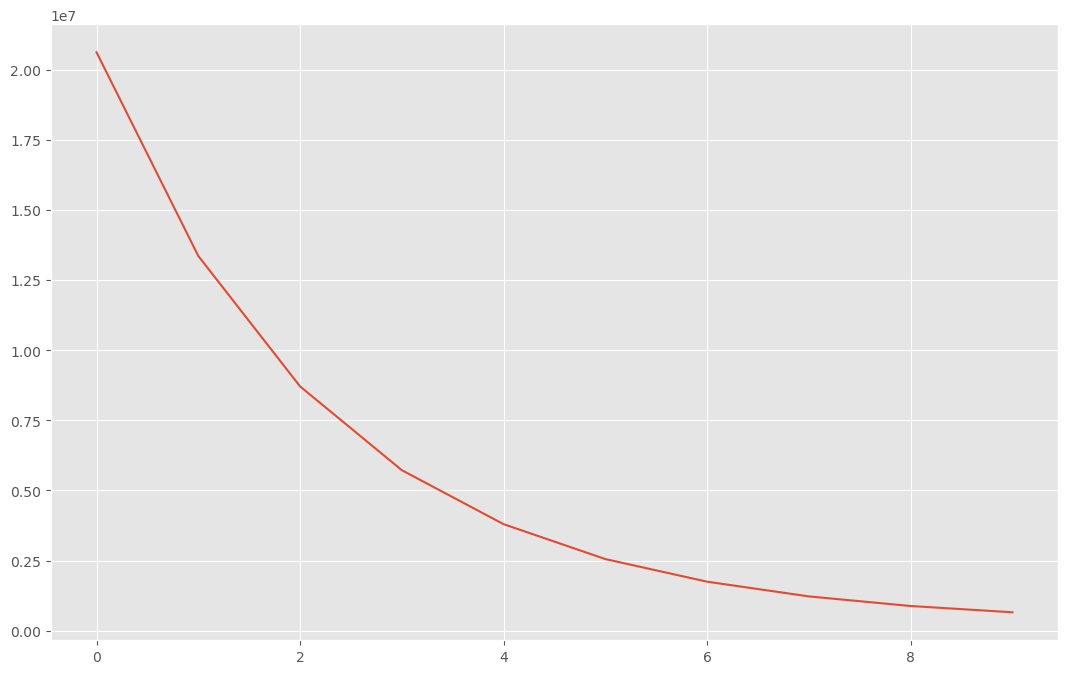

In [40]:
pd.Series(model._learning_curve).plot();

In [41]:
model.get_coef()

array([37.64703773, 14.31510794, -0.67833492, 58.96192414, 42.42970301,
       55.00739864,  0.4053107 , -1.90509135, 51.62619891, 47.43921984,
        0.26873495, 12.39864997, 12.48046697, 43.10478175])

In [42]:
model._features_names

['col_0',
 'col_1',
 'col_2',
 'col_3',
 'col_4',
 'col_5',
 'col_6',
 'col_7',
 'col_8',
 'col_9',
 'col_10',
 'col_11',
 'col_12',
 'col_13',
 'bias']

In [43]:
model._get_feature_importance(bias=False)

,feature_name,coef
0,col_0,37.647038
1,col_1,14.315108
2,col_2,-0.678335
3,col_3,58.961924
4,col_4,42.429703
5,col_5,55.007399
6,col_6,0.405311
7,col_7,-1.905091
8,col_8,51.626199
9,col_9,47.439220
